## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-11-29 13:43:29--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-29 13:43:29--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6caac1427aa673ad4e3fa5e041.dl.dropboxusercontent.com/cd/0/inline/Ba68OQciWIMlKjd9BEWSrhG0DIog4brvqn4uep0voyROzJVvxxDwis8iFDLx5KgeSj6rZfbMCbXI2jt-T8w07_eHpBy5jNlYbEpxMtxYHXGUxt3NbcfpB6Z9_Xe_8obxohgy5ichvyZA8v8rQmZe4cdb/file# [following]
--2021-11-29 13:43:29--  https://uc6caac1427aa673ad4e3fa5e041.dl.dropboxusercontent.com/cd/0/inline/Ba68OQciWIMlKjd9BEWSrhG0DIog4brvqn4uep0voyROzJVvxxDwis8iFDLx5KgeSj6rZfbMCbXI2jt-T8w07_eHpBy5jNlYbEpxMtxYHXG

  7600K .......... .......... .......... .......... .......... 23% 77.5M 3s
  7650K .......... .......... .......... .......... .......... 23% 12.7M 3s
  7700K .......... .......... .......... .......... .......... 23%  109M 3s
  7750K .......... .......... .......... .......... .......... 24% 21.2M 3s
  7800K .......... .......... .......... .......... .......... 24% 60.3M 3s
  7850K .......... .......... .......... .......... .......... 24%  113M 3s
  7900K .......... .......... .......... .......... .......... 24% 46.3M 3s
  7950K .......... .......... .......... .......... .......... 24% 22.9M 3s
  8000K .......... .......... .......... .......... .......... 24% 22.9M 3s
  8050K .......... .......... .......... .......... .......... 24% 17.1M 3s
  8100K .......... .......... .......... .......... .......... 25% 25.9M 3s
  8150K .......... .......... .......... .......... .......... 25% 15.6M 3s
  8200K .......... .......... .......... .......... .......... 25% 12.6M 3s
  8250K ....

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [5]:
import pandas as pd
import random
import numpy as np

file_name = "data_000637.txt"
#1310719 highest row index
N = random.randint(10000, 1310719) 
df=pd.read_csv(file_name, nrows = N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
457830,1,1,21,3869204787,1847,26
457831,1,0,58,3869204787,1850,15
457832,1,1,32,3869204787,1852,6
457833,1,0,50,3869204787,1851,20


2\. Find out the number of BX in a ORBIT (the value 'x').

In [6]:
#Each TDC count corresponds to 25/30 ns,
#whereas a unit of BX_COUNTER corresponds to 25 ns, 
#and the ORBIT_CNT is increased every 'x' BX_COUNTER

#25/30 is the fraction of a nano second

#TDC goes to 30 returns to 1 
x = df['BX_COUNTER'].max()+1 # flicks 

print(x)

3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [10]:
#each row approx 25ns
#orbit number of bx counts 
ns = 10**(-9) 
#time = 25*conversion*N
#print('Time:', time, 's')

start_orbit=df['ORBIT_CNT'].min() #set t=0 here 
d_orbit = df['ORBIT_CNT'].max() - df['ORBIT_CNT'].min()
t= x * d_orbit*(25/30)*30*ns

print(t)
print(d_orbit)

0.411642
4620


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [11]:
#Change in orbits from start
#add the contrbution at that time by reading the column
#the 30 factor cancels itself
t_abs = (df['ORBIT_CNT']-start_orbit)*x*25+(df['BX_COUNTER']-df['BX_COUNTER'][0])*25+df['TDC_MEAS']*(25/30)
df['ABS_TIME'] = t_abs
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,0,0,123,3869200167,2374,26,2.166667e+01
1,0,0,124,3869200167,2374,27,2.250000e+01
2,0,0,63,3869200167,2553,28,4.498333e+03
3,0,0,64,3869200167,2558,19,4.615833e+03
4,0,0,64,3869200167,2760,25,9.670833e+03
...,...,...,...,...,...,...,...
457830,0,1,21,3869204787,1847,26,4.116288e+08
457831,1,0,58,3869204787,1850,15,4.116289e+08
457832,1,1,32,3869204787,1852,6,4.116290e+08
457833,1,0,50,3869204787,1851,20,4.116289e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [12]:
df['HEAD'] = np.random.randint(0, 2, N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,2.166667e+01
1,0,0,124,3869200167,2374,27,2.250000e+01
2,1,0,63,3869200167,2553,28,4.498333e+03
3,1,0,64,3869200167,2558,19,4.615833e+03
4,0,0,64,3869200167,2760,25,9.670833e+03
...,...,...,...,...,...,...,...
457830,1,1,21,3869204787,1847,26,4.116288e+08
457831,0,0,58,3869204787,1850,15,4.116289e+08
457832,1,1,32,3869204787,1852,6,4.116290e+08
457833,1,0,50,3869204787,1851,20,4.116289e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [13]:
ndf=df
ndf['HEAD']=1
ndf

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,2.166667e+01
1,1,0,124,3869200167,2374,27,2.250000e+01
2,1,0,63,3869200167,2553,28,4.498333e+03
3,1,0,64,3869200167,2558,19,4.615833e+03
4,1,0,64,3869200167,2760,25,9.670833e+03
...,...,...,...,...,...,...,...
457830,1,1,21,3869204787,1847,26,4.116288e+08
457831,1,0,58,3869204787,1850,15,4.116289e+08
457832,1,1,32,3869204787,1852,6,4.116290e+08
457833,1,0,50,3869204787,1851,20,4.116289e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

Text(0.5, 1.0, 'FPGA 1')

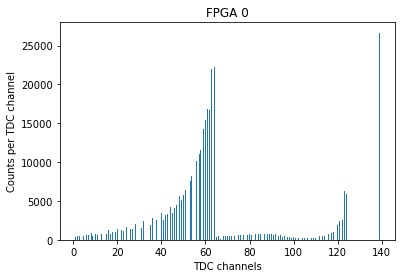

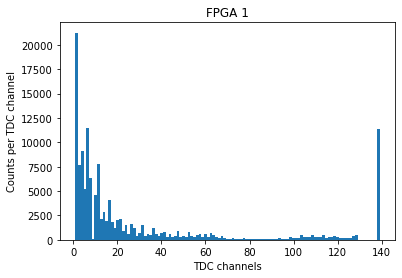

In [19]:
import matplotlib.pyplot as plt

fpga0=df[df['FPGA']==0]
fpga1=df[df['FPGA']==1]

TDC0 = fpga0['TDC_CHANNEL']
TDC1 = fpga1['TDC_CHANNEL']

plt.figure()
y,bin_edges, bar_container=plt.hist(TDC0, bins='auto')
plt.xlabel("TDC channels")
plt.ylabel("Counts per TDC channel")
plt.title('FPGA 0')

plt.figure()
plt.hist(TDC1, bins='auto')
plt.xlabel("TDC channels")
plt.ylabel("Counts per TDC channel")
plt.title('FPGA 1'

#histp = fpga0['TDC_CHANNEL'].hist(bins='auto')


8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [29]:
top_3=fpga0.groupby(by='TDC_CHANNEL').count().nlargest(3,'HEAD')
top_3

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
TDC_CHANNEL,,,,,,
139,26652,26652,26652,26652,26652,26652
64,22263,22263,22263,22263,22263,22263
63,21994,21994,21994,21994,21994,21994


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [34]:
unique_orb = df['ORBIT_CNT'].nunique()
print('Unique Orbits:', unique_orb)
chan_139 = df[df['TDC_CHANNEL']==139]
unique_orb_139 =chan_139['ORBIT_CNT'].nunique()
print('Unique Orbits Channel 139:', unique_orb_139)

Unique Orbits: 4618
Unique Orbits Channel 139: 4605
